In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('Energy Prediction - Q1_dataset_train.csv')

In [19]:
df.head()

,Menu Category,Per Serve Size,Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Energy
0,Regular Menu,168 g,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,402.05
1,Regular Menu,146 g,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,339.52
2,Regular Menu,199 g,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,652.76
3,Regular Menu,250 g,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,674.68
4,Regular Menu,177 g,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,512.17


In [20]:
df['Menu Category'].nunique()

7

In [21]:
df.describe()

,Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Energy
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000,141.000000
mean,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143,244.635461
std,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490,185.554837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000,116.360000
50%,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000,219.360000
75%,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000,339.520000
max,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000,834.360000


In [25]:
df.isnull().sum()

Menu Category             0
Per Serve Size            0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
Energy                    0
dtype: int64

In [26]:
df.dropna(axis = 0, inplace=True)

In [27]:
df.isnull().sum()

Menu Category             0
Per Serve Size            0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
Energy                    0
dtype: int64

In [33]:
df.duplicated().value_counts()

False    140
dtype: int64

In [28]:
features_1 = df.drop(['Menu Category','Energy'], axis=1)

In [30]:
features_1.head()

,Per Serve Size,Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,168 g,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,146 g,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,199 g,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,250 g,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,177 g,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [46]:
output_1 = df['Energy']

In [47]:
output_1

0      402.05
1      339.52
2      652.76
3      674.68
4      512.17
        ...  
136     11.23
137     86.40
138     51.03
139     45.08
140     72.25
Name: Energy, Length: 140, dtype: float64

In [34]:
import seaborn as sns 

<AxesSubplot:>

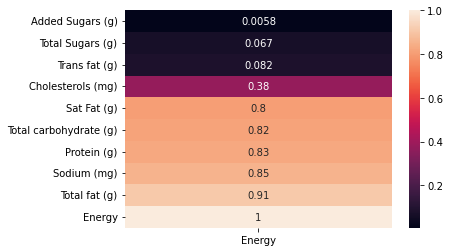

In [44]:
sns.heatmap(df.corr()[['Energy']].sort_values('Energy'), annot=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
Per_Serve_Size = LabelEncoder()

In [39]:
features_1['Per_Serve_Size'] = Per_Serve_Size.fit_transform(features_1["Per Serve Size"])

In [41]:
features_1 = features_1.drop(['Per Serve Size'], axis=1)

In [42]:
features_1

,Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Per_Serve_Size
0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,31
1,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,22
2,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,37
3,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,52
4,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,33
...,...,...,...,...,...,...,...,...,...,...
136,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05,97
137,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00,68
138,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95,18
139,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04,86


### we could use


In [ ]:
#df_test['Per Serve Size'] = df_train['Per Serve Size'].str.replace("g","")
#df_test['Per Serve Size'] = df_train['Per Serve Size'].str.replace("ml","")

In [50]:
from sklearn import linear_model

In [51]:
model_1 = linear_model.LinearRegression()

In [52]:
model_1.fit(features_1,output_1)

LinearRegression()

In [54]:
y_pred = model_1.predict(features_1)

In [63]:
test = pd.read_csv('Energy Prediction - Q1_dataset_test.csv')

In [66]:
test = test.drop(['Menu Category'], axis=1)

In [69]:
Per_Serve_Size_1 = LabelEncoder()

In [70]:
test['Per_Serve_Size_1'] = Per_Serve_Size_1.fit_transform(test["Per Serve Size"])

In [72]:
test = test.drop(['Per Serve Size'], axis=1)

In [73]:
test.head()

,Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Per_Serve_Size_1
0,0.26,0.49,0.15,0.04,0.25,12.36,7.65,2.50,113.23,3
1,0.03,0.01,0.01,0.01,0.10,1.99,1.53,1.34,65.24,0
2,0.51,0.36,0.08,0.01,0.05,2.50,0.66,0.40,414.71,6
3,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05,7
4,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00,4


In [74]:
model_1.predict(test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Per_Serve_Size_1
Feature names seen at fit time, yet now missing:
- Per_Serve_Size

  warnings.warn(message, FutureWarning)


array([ 55.80399783,   3.52713282,  26.16465968, 116.86141713,
        87.06561487,  45.49622495,  38.34390587,  74.82750392])

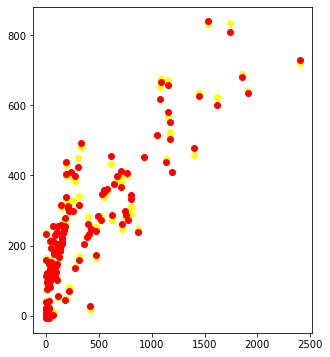

In [123]:
plt.figure(figsize=(5,6))
plt.scatter(features_1['Sodium (mg)'],output_1, color= 'yellow')
plt.scatter(features_1['Sodium (mg)'],y_pred, color= 'red')

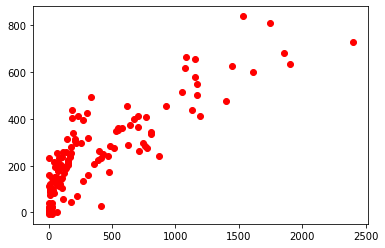

In [121]:
plt.scatter(df['Sodium (mg)'],y_pred, color= 'red')

In [77]:
from sklearn import metrics

In [79]:
metrics.r2_score(output_1,y_pred)

0.9940561448806405

In [80]:
metrics.mean_absolute_error(output_1,y_pred)

8.520045327505981

In [81]:
metrics.mean_squared_error(output_1,y_pred)

202.96117415591755

<AxesSubplot:xlabel='Sodium (mg)', ylabel='Energy'>

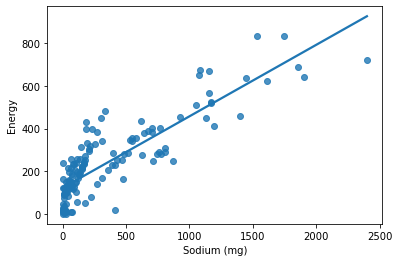

In [92]:
import seaborn as sns
sns.regplot(x = "Sodium (mg)",
            y = "Energy", 
            ci = None,
            data = df)

### Second Model 

In [106]:
df1 = pd.read_csv('Energy Prediction - Q2_Dataset (1).csv')

In [107]:
df1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df1[['YearsExperience']])
df1['YearsExperience']= scaler.transform(df1[['YearsExperience']])

scaler.fit(df1[['Salary']])
df1['Salary'] = scaler.transform(df1[['Salary']])
df1.head()

In [109]:
model_2 = linear_model.LinearRegression()

In [110]:
model_2.fit(df1[['YearsExperience']],df1.Salary)

LinearRegression()

In [111]:
y_pred_1 = model_2.predict(df1[['YearsExperience']])

In [112]:
y_pred_1

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

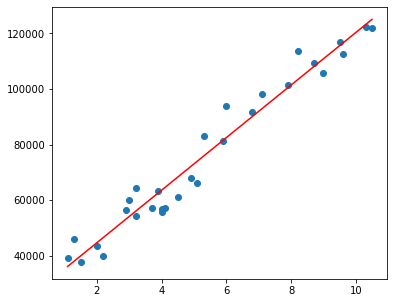

In [113]:
plt.figure(figsize=(6,5))
plt.scatter(df1.YearsExperience, df1.Salary)
plt.plot(df1.YearsExperience, y_pred_1, color = 'red')

age 12,6.4,9.3

In [115]:
model_2.predict([[12]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139191.74805613])

In [116]:
model_2.predict([[6]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([82491.9741274])

In [117]:
model_2.predict([[4]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63592.04948449])

In [118]:
model_2.predict([[9]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([110841.86109176])

In [119]:
model_2.predict([[3]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54142.08716303])